# Loss functcion


$\text{Loss}(y) = (y - 10)^2$

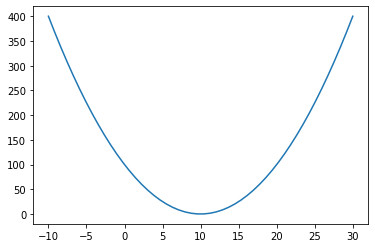

In [1]:
import numpy as np
import matplotlib.pyplot as plt

target = 10

def loss(x):
    y =  1 * x
    return (y - target) ** 2

plt.plot(np.linspace(-10, 30), loss(np.linspace(-10, 30)))
plt.show()

## Run gradient descent manually on Loss function

We can manually calculate the gradient by hand $ \frac{dL}{dy} = -2y - 2 \cdot 10 $

Then, we can update y by $ y' = y - \text{lr} \cdot \frac{dL}{dy}$


This is an easy example, you can use lr=0.5 to achieve global minimal

step 0  w= 25.200000000000003
step 1  w= -2.1600000000000037
step 2  w= 19.728000000000005
step 3  w= 2.217599999999994
step 4  w= 16.225920000000006
step 5  w= 5.019263999999994
step 6  w= 13.984588800000004
step 7  w= 6.812328959999996
step 8  w= 12.550136832000003
step 9  w= 7.959890534399997


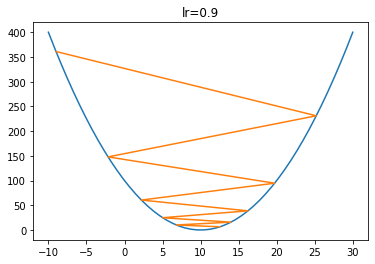

In [2]:
w = 0
w = -9
lr = 0.5
lr = 0.3
lr = 1.03
lr = 0.9
history = []


def grad(w):
    return 2 * w - 2 * target


for i in range(10):
    history.append([w, loss(w)])
    w = w - lr * grad(w)
    print("step", i, " w=", w)


plt.title(f"lr={lr}")
plt.plot(np.linspace(-10, 30), loss(np.linspace(-10, 30)))
plt.plot(*zip(*history))
plt.show()

## Run gradient descent via pytorch on Loss function

Set `w` as a torch Tensor and set `requires_grad` on to calculate the gradient.

And using SGD, or Adam to update `w`

0 tensor(21.0000, requires_grad=True)
10 tensor(18.5699, requires_grad=True)
20 tensor(14.6888, requires_grad=True)
30 tensor(12.0837, requires_grad=True)
40 tensor(9.9177, requires_grad=True)
50 tensor(8.8750, requires_grad=True)
60 tensor(9.6221, requires_grad=True)
70 tensor(10.4341, requires_grad=True)
80 tensor(9.9273, requires_grad=True)
90 tensor(9.9282, requires_grad=True)


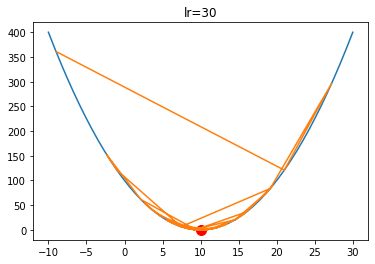

In [3]:
import torch
from torch.optim import Adam, SGD

w = torch.tensor(-9., requires_grad=True)
lr = 30
opt = Adam([w], lr=lr)
# opt = SGD([w], lr=lr)
history = []

for i in range(100):
    history.append([float(w), float(loss(w))])
    opt.zero_grad()  # set accumulated gradient to 0
    l = loss(1 * w)  # calculate  loss
    l.backward()     # calculate the gradient
    opt.step()       # update the model i.e. w
    if i % 10 == 0:
        print(i, w)


plt.plot(float(w), float(loss(w)), "r.", markersize=20)
plt.title(f"lr={lr}")
plt.plot(np.linspace(-10, 30), loss(torch.tensor(np.linspace(-10, 30))))
plt.plot(*zip(*history))
plt.show()

# Regression

## Linear Regression

Input: A number

Output: A number

Data: 100 samples

Optimizer: Adam, lr = 1.,  other parameters remain default

Model: one value (Slope)

Loss Function: Mean square error

Epochs = 100

Batch_size = 100

torch.Size([100, 1]) torch.Size([1]) torch.Size([100])
0 	slope tensor([1.1000], requires_grad=True) 	Loss 330046.03125
10 	slope tensor([10.0267], requires_grad=True) 	Loss 3902.88720703125
20 	slope tensor([12.5881], requires_grad=True) 	Loss 26695.404296875
30 	slope tensor([9.9896], requires_grad=True) 	Loss 2640.494384765625
40 	slope tensor([9.0454], requires_grad=True) 	Loss 5750.677734375
50 	slope tensor([10.1774], requires_grad=True) 	Loss 2428.629638671875
60 	slope tensor([10.2717], requires_grad=True) 	Loss 2768.581787109375
70 	slope tensor([9.8138], requires_grad=True) 	Loss 2488.08349609375
80 	slope tensor([9.9789], requires_grad=True) 	Loss 2407.59521484375
90 	slope tensor([10.0595], requires_grad=True) 	Loss 2422.33349609375


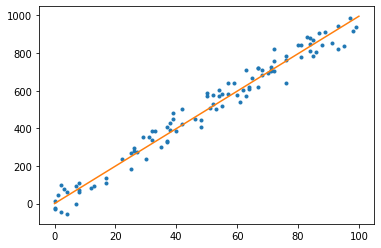

In [21]:
# prepare input data
from numpy.random import default_rng
rng = default_rng(seed=0)
X = rng.integers(100, size=100)
Y = 10 * X + rng.normal(scale=50, size=100)
X = torch.FloatTensor(X).view(100, 1)
Y = torch.FloatTensor(Y)

# using pytorch tensor as my model
w = torch.tensor([.1], requires_grad=True)  # w as a slope variable
def model(x, w):
    return x @ w
print(f"{X.size()} {w.size()} {Y.size()}")

# loss fcuntion
loss_func = torch.nn.MSELoss()
# optimizor
lr = 1.
opt = Adam([w], lr=lr)

# run model
for i in range(100):
    opt.zero_grad()
    l = loss_func(model(X, w), Y)
    l.backward()
    opt.step()
    if i % 10 == 0:
        print(i, "\tslope", w, "\tLoss", float(l))

# plot
plt.plot(X, Y, '.')
x = np.linspace(0, 100, 100)
plt.plot(x, model(x.reshape(100, 1), w.detach().numpy()))
plt.show()

### Loss lanscape

torch.Size([100, 1]) torch.Size([100, 1])


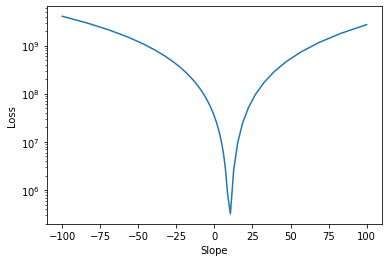

In [22]:
x = np.logspace(-2, 2, 50)
w = torch.FloatTensor(np.hstack([np.flip(-x), x])).view(100, 1)
print(X.shape, w.shape)
loss = ((w @ X.view(1, 100) - Y) ** 2).sum(axis=1)

plt.plot(w.flatten(), loss)
plt.gca().set_yscale('log')
plt.ylabel("Loss")
plt.xlabel("Slope")
plt.show()

## Regression via deep learning

Input: A number

Output: A number

Data: 100 samples

Optimizer: Adam, lr = .01, other parameters remain default

Model: Hidden layer = 32 channel

Loss Function: Mean square error

Epochs = 100

Batch_size = 100

0 	Loss 332709.96875
1000 	Loss 22654.615234375
2000 	Loss 2495.763427734375
3000 	Loss 2388.06103515625
4000 	Loss 2387.950927734375
5000 	Loss 2387.7958984375
6000 	Loss 2387.57666015625
7000 	Loss 2387.2958984375
8000 	Loss 2386.9921875
9000 	Loss 2386.739990234375


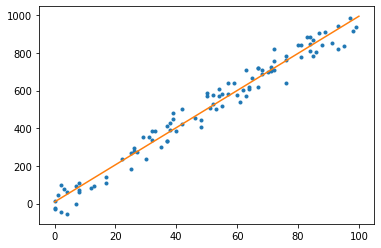

In [23]:
Y = torch.FloatTensor(Y).view(100, 1)

model = torch.nn.Sequential(
        torch.nn.Linear(1, 1),
        # torch.nn.Linear(1, 32),
        # torch.nn.ReLU(),
        # torch.nn.Linear(32, 1),
)

lr = 0.01
opt = Adam(model.parameters(), lr=lr)
history = []

for i in range(10000):
    opt.zero_grad()
    l = loss_func(model(X), Y)
    l.backward()
    opt.step()
    history.append(float(l))
    if i % 1000 == 0:
        print(i, "\tLoss", float(l))


plt.plot(X, Y, '.')
x = torch.FloatTensor(np.linspace(0, 100, 100))
plt.plot(x, model(x.reshape(100, 1)).flatten().detach())
plt.show()

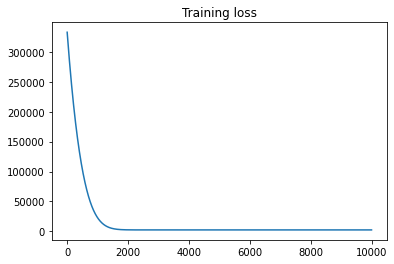

In [24]:
plt.plot(history)
plt.title("Training loss")
plt.show()

## Regression fit for non-linear data

Input: A number

Output: A number

Data: 100 samples

Optimizer: Adam, lr = .01, other parameters remain default

Model: Hidden layer = 32 channel

Loss Function: Mean square error

Epochs = 100

Batch_size = 100


0 	Loss 758062.25
1000 	Loss 10685.46484375
2000 	Loss 1029.7677001953125
3000 	Loss 572.6411743164062
4000 	Loss 496.8406677246094


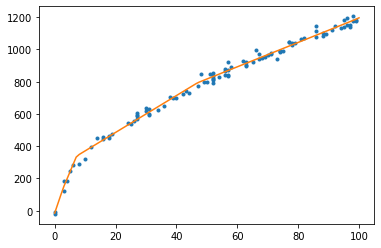

In [8]:
X = rng.integers(100, size=100)
Y = 2 * X + rng.normal(scale=20, size=100) + 100 * np.sqrt(X)
X = torch.FloatTensor(X).view(100, 1)
Y = torch.FloatTensor(Y).view(100, 1)

# define a deep NN and train it whatever
model = torch.nn.Sequential(
        torch.nn.Linear(1, 32),
        torch.nn.ReLU(),
        torch.nn.Linear(32, 1),
)

lr = 0.01
opt = Adam(model.parameters(), lr=lr)
history = []

for i in range(5000):
    opt.zero_grad()
    l = loss_func(model(X), Y)
    l.backward()
    opt.step()
    history.append(float(l))
    if i % 1000 == 0:
        print(i, "\tLoss", float(l))


plt.plot(X, Y, '.')
x = torch.FloatTensor(np.linspace(0, 100, 100))
plt.plot(x, model(x.reshape(100, 1)).flatten().detach())
plt.show()

# Classification

###  Binary Cross Entropy Loss

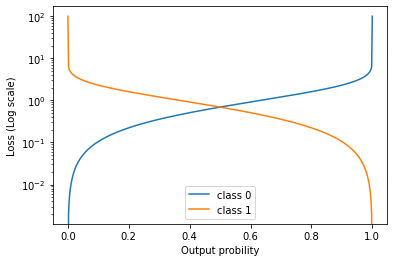

In [9]:
x = np.linspace(0, 1, 500)
c1 = np.ones(x.shape[0])
c0 = np.ones(x.shape[0]) * 0


x = torch.FloatTensor(x).view(-1, 1)
c0 = torch.FloatTensor(c0).view(-1, 1)
c1 = torch.FloatTensor(c1).view(-1, 1)
l = torch.nn.BCELoss(reduction='none')

plt.plot(x.flatten(), l(x, c0), label="class 0")
plt.plot(x.flatten(), l(x, c1), label="class 1")
plt.legend()
plt.gca().set_yscale('log')
plt.xlabel("Output probility")
plt.ylabel("Loss (Log scale)")
plt.show()

## Classification for one class

Input: 1x2 (x,y location)
Output: 1 for red, 0 for blue

Data:
1000 numbers (0-1000)

Training: Test: 8:2

Optimizer: Adam, lr = 0.01, default for other parameters

Model: No hidden layer: i.e.   2x1 weight

Loss Function: Binary cross entropy

Epochs = 100

Batch_size = 800


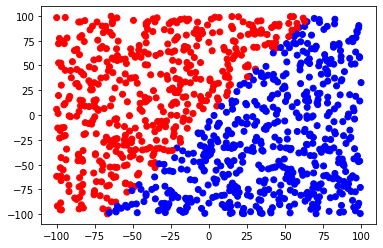

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import Adam, SGD

from numpy.random import default_rng
rng = default_rng(seed=0)

X = rng.uniform(-100, 100, 1000)
Y = rng.uniform(-100, 100, 1000)
C = 2 * Y - 3 * X > 0
plt.scatter(X, Y, color=list(map(lambda i: "r" if i else "b", C)))

0 	Loss 43.019630432128906 	acc tensor(0.2362)
10 	Loss 37.06155014038086 	acc tensor(0.2688)
20 	Loss 27.3648681640625 	acc tensor(0.3237)
30 	Loss 9.341534614562988 	acc tensor(0.4563)
40 	Loss 1.7682949304580688 	acc tensor(0.7487)
50 	Loss 0.4103007912635803 	acc tensor(0.8938)
60 	Loss 0.06960050016641617 	acc tensor(0.9688)
70 	Loss 0.07144555449485779 	acc tensor(0.9638)
80 	Loss 0.06839482486248016 	acc tensor(0.9663)
90 	Loss 0.05012638866901398 	acc tensor(0.9775)
test acc tensor(0.9650)


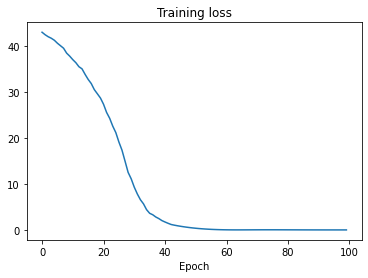

In [11]:
# Separate traing and testing set and cast to torch Tensor
X = np.vstack([X,Y]).T
X = torch.FloatTensor(X).view(1000, 2)
Y = torch.FloatTensor(C).view(1000, 1)

# Add bad samples
# ri = np.random.randint(0, 1000, 20)
# C[ri] = np.invert(C[ri])

X_train = X[:800]
X_test  = X[800:]
Y_train = Y[:800]
Y_test  = Y[800:]

# define model
model = torch.nn.Sequential(
        torch.nn.Linear(2, 1),
        # torch.nn.ReLU(),
        # torch.nn.Linear(32, 1),
        torch.nn.Sigmoid(),
)

# training parameters
lr = 0.01
opt = Adam(model.parameters(), lr=lr)
history = []
loss_func = torch.nn.BCELoss()

# Training for 100 epoches
for i in range(100):
    opt.zero_grad()
    Y_predict = model(X_train)
    l = loss_func(Y_predict, Y_train)
    l.backward()
    opt.step()
    history.append(float(l))
    if i % 10 == 0:
        with torch.no_grad():
            print(i, "\tLoss", float(l), "\tacc", torch.mean(((Y_predict >= 0.5) == Y_train).float()))

# testing
Y_predict = model(X_test) >= 0.5
print("test acc", torch.mean((Y_predict == Y_test).float()))

# plot
plt.plot(history)
plt.title("Training loss")
plt.xlabel("Epoch")
plt.show()

Parameter containing:
tensor([[-0.2226,  0.1394]], requires_grad=True) Parameter containing:
tensor([0.7339], requires_grad=True)


tensor(-1.5969, grad_fn=<DivBackward0>)

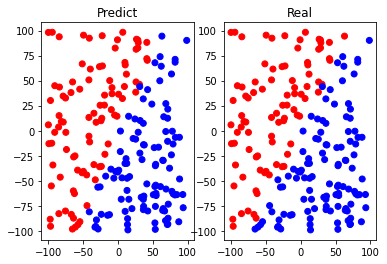

In [12]:
plt.subplot(1,2,1)
plt.title("Predict")
plt.scatter(X_test[:,  0], X_test[:, 1], color=list(map(lambda i: "r" if i else "b", Y_predict[:, 0])))
plt.subplot(1,2,2)
plt.title("Real")
plt.scatter(X_test[:,  0], X_test[:, 1], color=list(map(lambda i: "r" if i else "b", Y_test[:, 0])))

l, b = list(model.parameters())
print(l, b)
# C = 2 * Y - 3 * X > 0
l[0, 0] /  l[0, 1]  # -3 / 2 = 1.5

### Loss Landscape

Text(0.5, 0, 'Slope')

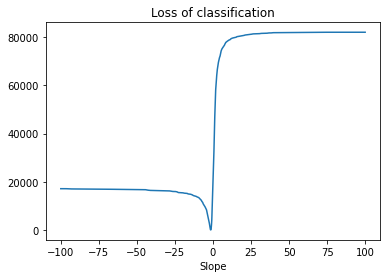

In [13]:
s = np.logspace(-2, 2, 250)
s = np.hstack([np.flip(-s), s])
s = np.vstack([s, np.ones(500)]).T
loss_s = torch.nn.BCELoss(reduction='none')(torch.nn.Sigmoid()((X @ torch.FloatTensor(s.T))), torch.tile(Y, (1, 500))).sum(axis=0)
plt.plot(s[:, 0], loss_s)
# plt.gca().set_yscale('log')
plt.title("Loss of classification")
plt.xlabel("Slope")

## Classification for mutliple class

Input: 1x2 (x,y location)
Output: 1 for red, 0 for blue, 2 for black

Data:
1000 numbers (0-1000)

Training: Test: 8:2

Optimizer: Adam, lr = 0.01, default for other parameters

Model: One hidden layeer(32 channel)

Loss Function: Binary cross entropy

Epochs = 100

Batch_size = 800

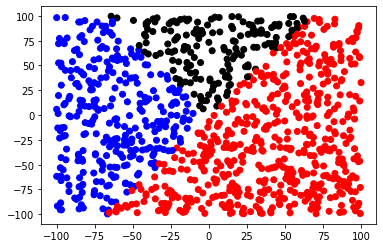

In [14]:
rng = default_rng(seed=0)
X = rng.uniform(-100, 100, 1000)
Y = rng.uniform(-100, 100, 1000)
C = 2 * Y - 3 * X > 0
C = C.astype(np.int)
Ci = (2 * Y - 3 * X > 0) & (2 * Y + 3 * X > 0)
C[Ci] = 2

def classColorMap(i):
    if i == 0:
        return 'r'
    elif i == 1:
        return 'b'
    else:
        return 'k'

plt.scatter(X, Y, color=list(map(classColorMap, C)))
plt.show()

0 	Loss 12.9987	acc tensor(0.4700)	test acc tensor(0.4100)
1 	Loss 7.7278	acc tensor(0.4550)	test acc tensor(0.5200)
2 	Loss 3.0710	acc tensor(0.5275)	test acc tensor(0.6400)
3 	Loss 1.4054	acc tensor(0.6225)	test acc tensor(0.7450)
4 	Loss 1.2924	acc tensor(0.7362)	test acc tensor(0.7800)
5 	Loss 0.8596	acc tensor(0.7975)	test acc tensor(0.9000)
6 	Loss 0.5253	acc tensor(0.9038)	test acc tensor(0.8950)
7 	Loss 0.3912	acc tensor(0.8950)	test acc tensor(0.9050)
8 	Loss 0.2900	acc tensor(0.9112)	test acc tensor(0.9150)
9 	Loss 0.2004	acc tensor(0.9300)	test acc tensor(0.9350)
Test acc tensor(0.9350)


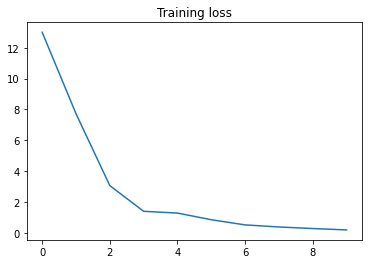

In [15]:
X = np.vstack([X,Y]).T
X = torch.FloatTensor(X).view(1000, 2)
Y = torch.LongTensor(C).view(1000)

X_train = X[:800]
X_test  = X[800:]
Y_train = Y[:800]
Y_test  = Y[800:]

def predict(y):
    #y = torch.nn.Softmax(dim=1)(y)
    value, ind = torch.max(y, 1)
    return ind

model = torch.nn.Sequential(
        torch.nn.Linear(2, 32),
        torch.nn.ReLU(),
        # torch.nn.Linear(32, 32),
        # torch.nn.ReLU(),
        torch.nn.Linear(32, 3),
        # torch.nn.Sigmoid(),
)

lr = 0.01
opt = Adam(model.parameters(), lr=lr)
history = []
loss_func = torch.nn.CrossEntropyLoss()


for i in range(10):
    opt.zero_grad()
    Y_predict = model(X_train)
    l = loss_func(Y_predict, Y_train)
    l.backward()
    opt.step()
    history.append(float(l))
    if i % 1 == 0:
        with torch.no_grad():
            print(i, f"\tLoss {float(l):.4f}\tacc", torch.mean((predict(Y_predict) == Y_train).float()), end="")
            print("\ttest acc", torch.mean((predict(model(X_test)) == Y_test).float()))


# testing
acc = torch.mean((predict(model(X_test)) == Y_test).float())
print("Test acc", acc)

# plot
plt.plot(history)
plt.title("Training loss")
plt.show()

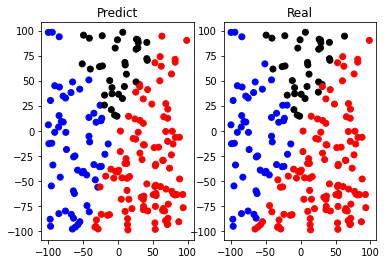

In [16]:
plt.subplot(1,2,1)
plt.title("Predict")
plt.scatter(X_test[:,  0], X_test[:, 1], color=list(map(classColorMap, predict(model(X_test)))))
plt.subplot(1,2,2)
plt.title("Real")
plt.scatter(X_test[:,  0], X_test[:, 1], color=list(map(classColorMap, Y_test)))

## Classification for one class (Advanced)

Input: A number
Output: 1 for number can be divided by 8, 0 for else

Data:
1000 numbers (0-1000)

Training: Test: 8:2

Preprocess: Using binary of the number as input. e.g. 12 = 0b00001100

Optimizer: Adam, lr = 0.01, default for other parameters

Model: one hidden layer with 32 channels

Loss Function: Binary cross entropy

Epochs = 100

Batch_size = 800


0 	Loss 0.6283754706382751 	acc tensor(0.8300)
10 	Loss 0.3206444978713989 	acc tensor(0.8750)
20 	Loss 0.28001633286476135 	acc tensor(0.8750)
30 	Loss 0.21344409883022308 	acc tensor(0.8750)
40 	Loss 0.15039710700511932 	acc tensor(0.8938)
50 	Loss 0.09580713510513306 	acc tensor(0.9912)
60 	Loss 0.057760901749134064 	acc tensor(0.9987)
70 	Loss 0.034369681030511856 	acc tensor(1.)
80 	Loss 0.020855169743299484 	acc tensor(1.)
90 	Loss 0.01319129578769207 	acc tensor(1.)
test acc tensor(1.)


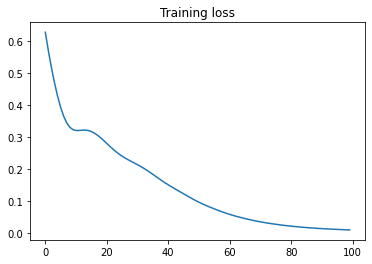

In [17]:
# Prepare the input data (You can use pytorch Datasets & Dataloaders to improve it)
# digit = np.random.randint(0, 1024, size=[1000])
digit = np.arange(0, 1000)
X = np.vstack([((2**i) & digit) > 0 for i in range(0, 10)]).T.astype(np.int)
Y = (digit % 8 == 0)
X = torch.FloatTensor(X).view(1000, 10)
Y = torch.FloatTensor(Y).view(1000, 1)

# Separate raining and testing
X_train = X[:800]
X_test  = X[800:]
Y_train = Y[:800]
Y_test  = Y[800:]

# define my model
model = torch.nn.Sequential(
        torch.nn.Linear(10, 32),
        torch.nn.ReLU(),
        torch.nn.Linear(32, 1),
        torch.nn.Sigmoid(),
)

# training parameters
lr = 0.01
opt = Adam(model.parameters(), lr=lr)
loss_func = torch.nn.BCELoss()
history = []

# training for 100 epoches
for i in range(100):
    opt.zero_grad()
    Y_predict = model(X_train)
    l = loss_func(Y_predict, Y_train)
    l.backward()
    opt.step()
    history.append(float(l))
    if i % 10 == 0:
        with torch.no_grad():
            print(i, "\tLoss", float(l), "\tacc", torch.mean(((Y_predict >= 0.5) == Y_train).float()))

# testing
Y_predict = model(X_test) >= 0.5
print("test acc", torch.mean((Y_predict == Y_test).float()))

# plot
plt.plot(history)
plt.title("Training loss")
plt.show()

## Classification for mutliple class class(Advance)

Input: A number
Output: 
* 1 for number can be divided by 8
* 2 for number can be divided by 3
* 3 for number can be divided by both 8 and 3
* 0 for else


Data:
1000 numbers (0-1000)

Training: Test: 8:2

Preprocess: Using binary of the number as input. e.g. 12 = 0b00001100

Optimizer: Adam, lr = 0.01, default for other parameters

Model: one hidden layer with 32 channels

Model input: 10 dim of 0 or 1 repesented a number

Model output: 4 probility

Loss Function: Cross entropy

Epoches: 100

Batch size: 800

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0 	Loss 1.399 	acc 0.314
10 	Loss 0.994 	acc 0.556
20 	Loss 0.882 	acc 0.556
30 	Loss 0.800 	acc 0.611
40 	Loss 0.732 	acc 0.637
50 	Loss 0.687 	acc 0.649
60 	Loss 0.661 	acc 0.656
70 	Loss 0.647 	acc 0.656
80 	Loss 0.638 	acc 0.654
90 	Loss 0.631 	acc 0.656
Test acc tensor(0.6450)


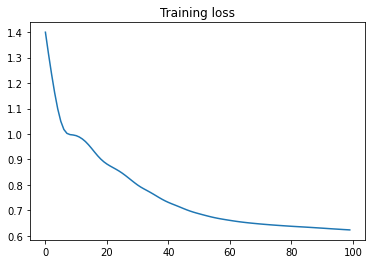

In [18]:
# Prepare input data
digit = np.random.randint(0, 1024, size=[1000])
X = np.vstack([((2**i) & digit) > 0 for i in range(0, 10)]).T.astype(np.int)
Y1 = (digit % 8 == 0)
Y2 = (digit % 3 == 0)
Y3 = (digit % 24 == 0)
Y = np.zeros(1000)
Y[Y1] = 1
Y[Y2] = 2
Y[Y3] = 3
X = torch.FloatTensor(X).view(1000, 10)
Y = torch.LongTensor(Y)

# Separate traingin and testing
X_train = X[:800]
X_test  = X[800:]
Y_train = Y[:800]
Y_test  = Y[800:]

# define model
model = torch.nn.Sequential(
        torch.nn.Linear(10, 32),
        torch.nn.ReLU(),
        torch.nn.Linear(32, 4), 
        # torch.nn.Sigmoid(),  # not needed
)

# training parameters
lr = 0.01
opt = Adam(model.parameters(), lr=lr)
loss_func = torch.nn.CrossEntropyLoss()
history = []

# wrap a predict function
def predict(y):
    value, ind = torch.max(torch.nn.Softmax()(y), 1)
    return ind

# training 100 epoches
for i in range(100):
    opt.zero_grad()
    Y_predict = model(X_train)
    l = loss_func(Y_predict, Y_train)
    l.backward()
    opt.step()
    history.append(float(l))

    # output
    with torch.no_grad():
        if i % 10 == 0:
            Y_predict = predict(Y_predict) 
            acc = torch.mean((Y_predict == Y_train).float())
            print(i, f"\tLoss {float(l):.3f} \tacc {float(acc):.3f}")


# testing
acc = torch.mean((predict(model(X_test)) == Y_test).float())
print("Test acc", acc)

# plot
plt.plot(history)
plt.title("Training loss")
plt.show()